In [1]:
import dask
import time

In [2]:
def square(n):
    time.sleep(1)
    return n * n
    
def add(m, n):
    time.sleep(1)
    return m * n

In [3]:
%%time 

x = square(1)
y = square(2)
z = add(x, y)

CPU times: user 2.87 ms, sys: 0 ns, total: 2.87 ms
Wall time: 3 s


## Building a computational graph
***

In [3]:
x = dask.delayed(square)(1)
y = dask.delayed(square)(2)
z = dask.delayed(add)(x, y)

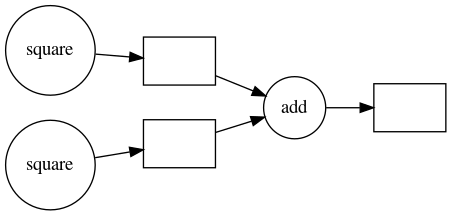

In [4]:
z.visualize(rankdir='LR')

In [6]:
%%time
z.compute()

CPU times: user 8.08 ms, sys: 0 ns, total: 8.08 ms
Wall time: 2.01 s


4

## Exercise 1
***
Rewrite the following cell so it's executed lazily.
 * Which functions should be delayed? `square`? `sum`? Both of them? Why?
 * Visualize the graph.
 * Compare the execution time with the sequential execution.

In [7]:
x = [square(i) for i in range(10)]
y = sum(x)
y

285

In [12]:
%load solutions/exercise1.py

## Exercise 2
***
Rewrite the following cell so it's executed lazily.
 * Which functions should be delayed?
 * Visualize the graph.
 * Compare the execution time with the sequential execution.

In [13]:
x = []
for i in range(10):
    x.append(square(i))

y = sum(x)

In [15]:
%load solutions/exercise2.py

## Exercise 3
***
Rewrite the following cell so it's executed lazily.
 * Which functions should be delayed?
 * Visualize the graph.

In [17]:
x = []
for i in range(10):
    if i % 2 == 0:
        x.append(square(i))
    else:
        x.append(add(i, i))

y = sum(x)

In [18]:
%load solutions/exercise3.py